# Population size, D = 10

In [9]:
library(tidyverse, magrittr)
library(ggdark)
library(future)
library(furrr)
future::plan(multicore)

In [16]:
source("../R/alg/cma-es-csa.R")
source("../R/alg/cma-es-expth.R")
source("../R/alg/cma-es-tpat.R")
source("../R/eval-funcs.R")
source("../R/plot-funcs.R")
options(repr.plot.width=20, repr.plot.height=10)

In [83]:
lambda = seq(10, 310, 20)
x0 = rep(100, 10)

In [80]:
run_exp = function(lambdas, alg, func, x0) {
    lambdas %>% furrr::future_map_dfr(function(lambda) {
        result = 
            alg(x0, fn = function(x) func(x), lower = -100, upper = 100, control = list(lambda = lambda))
        data.frame(
            counteval = result$counts[["function"]],
            lambda = lambda
        )
    })
}

In [99]:
plot_lambda = function(df, N) {
    df %>%
    ggplot2::ggplot() +
    ggplot2::geom_line(aes(x = lambda, y = counteval, col = func)) + 
    ggdark::dark_theme_bw() + 
    ggplot2::theme(
        axis.title = ggplot2::element_text(size = 15, face = "bold"),
        axis.text = ggplot2::element_text(size = 15, face = "bold"),
        legend.text = ggplot2::element_text(size = 15, face = "bold"),
        legend.title = ggplot2::element_text(size = 15, face = "bold"),
    ) + 
    ggplot2::scale_y_continuous(limits = c(0, 10000 * N), breaks = seq(0, 10000 * N, 10000))
}                               
plot_lambda_alg = function(df, N) {
    df %>%
    ggplot2::ggplot() +
    ggplot2::geom_line(aes(x = lambda, y = counteval, col = method)) + 
    ggdark::dark_theme_bw() + 
    ggplot2::theme(
        axis.title = ggplot2::element_text(size = 15, face = "bold"),
        axis.text = ggplot2::element_text(size = 15, face = "bold"),
        legend.text = ggplot2::element_text(size = 15, face = "bold"),
        legend.title = ggplot2::element_text(size = 15, face = "bold"),
    ) + 
    ggplot2::scale_y_continuous(limits = c(0, 10000 * N), breaks = seq(0, 10000 * N, 10000)) + 
    ggplot2::facet_wrap( ~ func)
}                               
                                                        

In [43]:
elips10 = . %>% ellips_func(a = 10)
elips100 = . %>% ellips_func(a = 100)

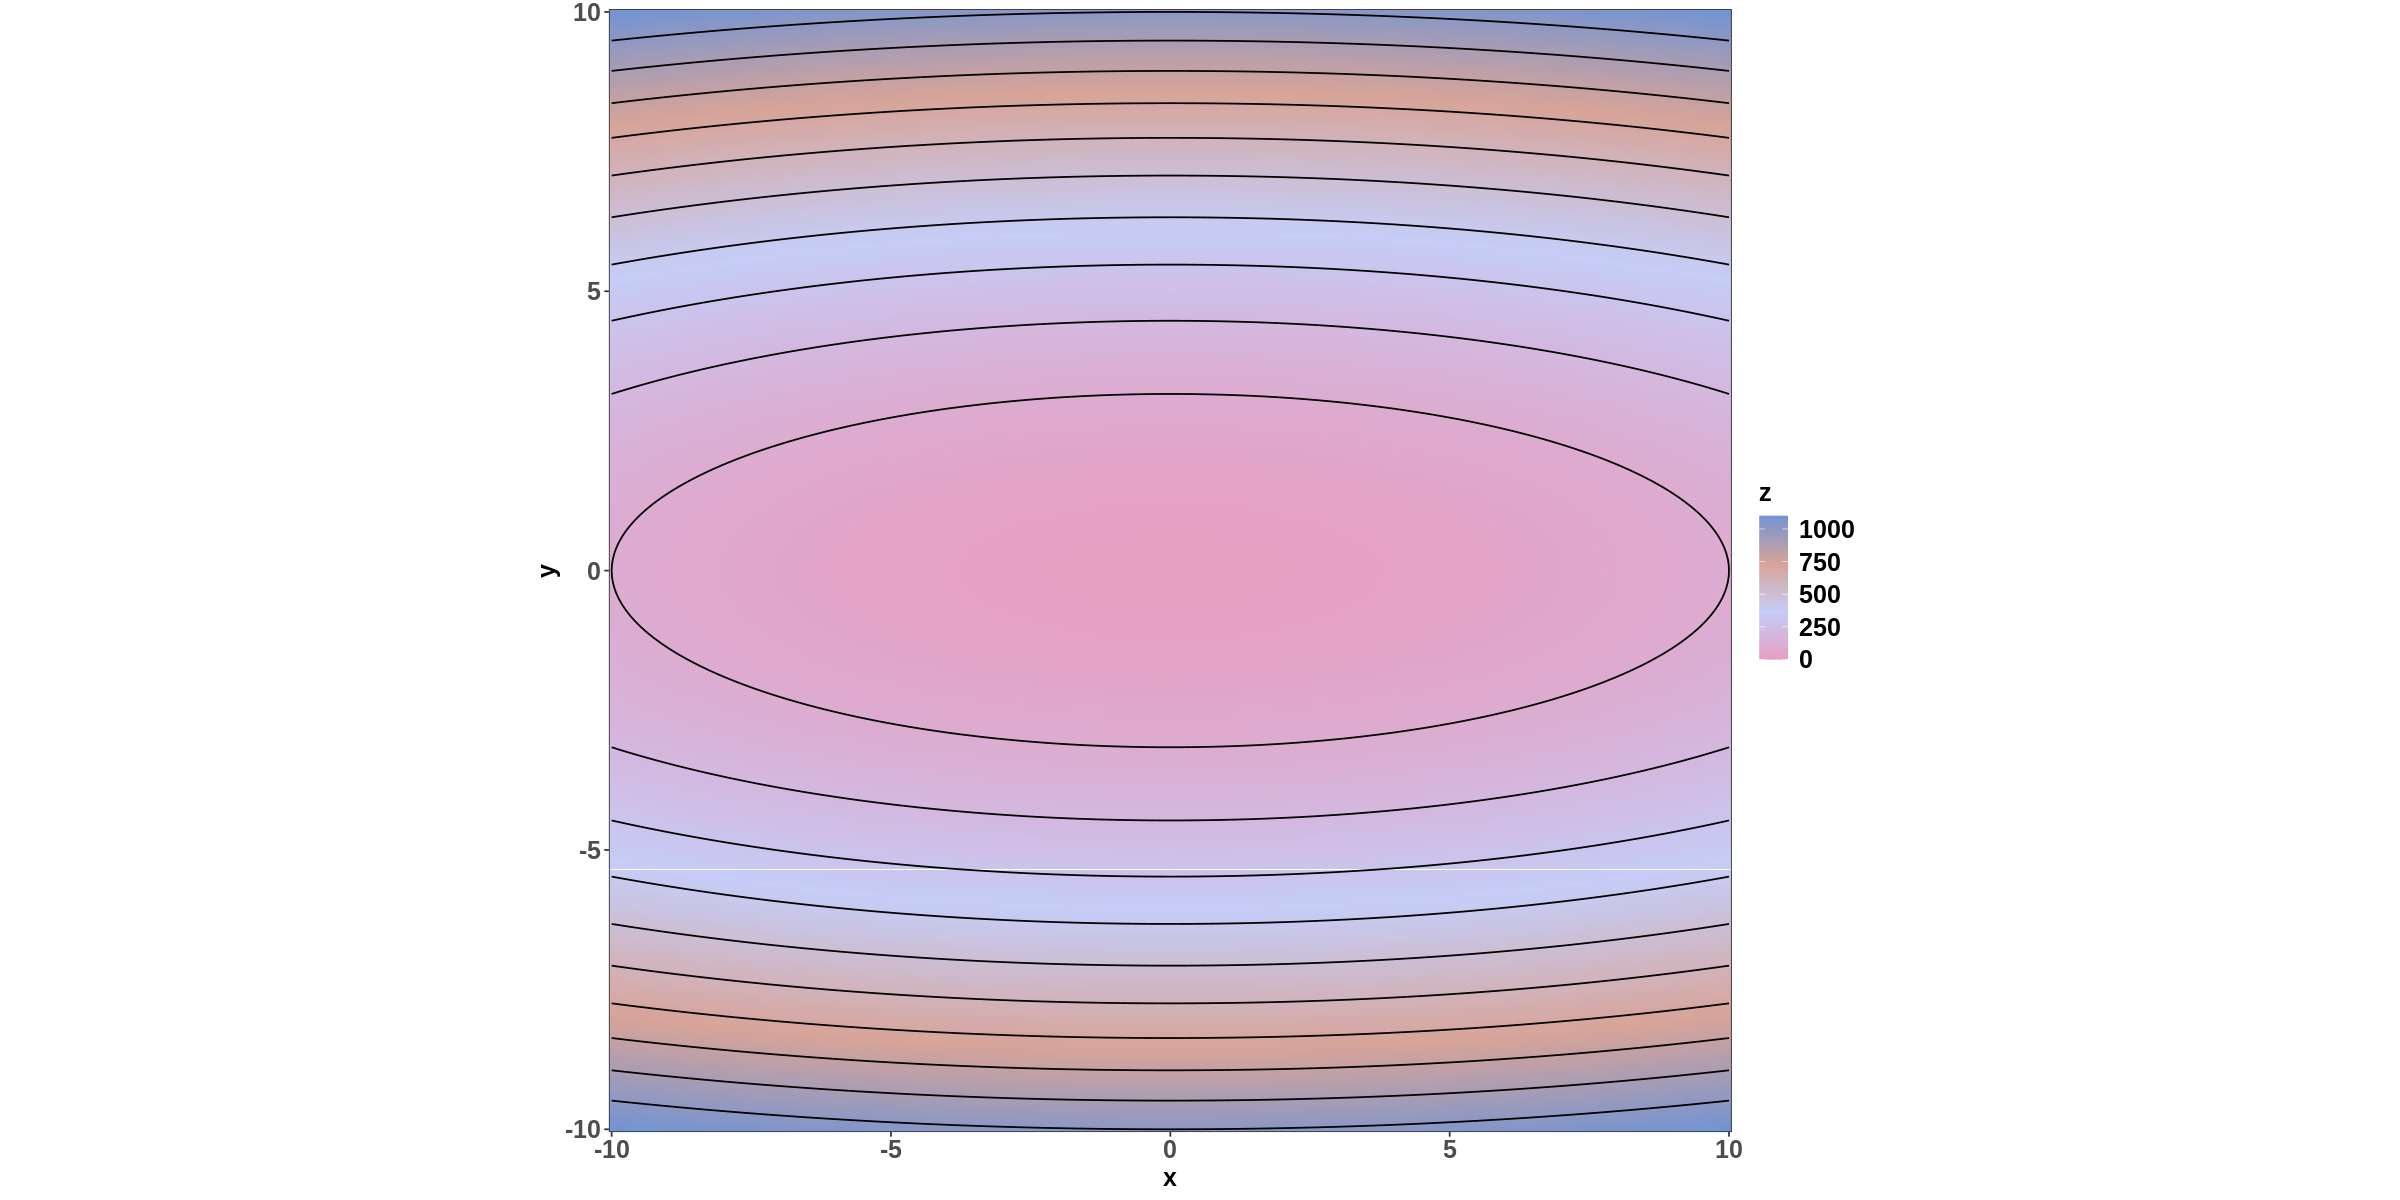

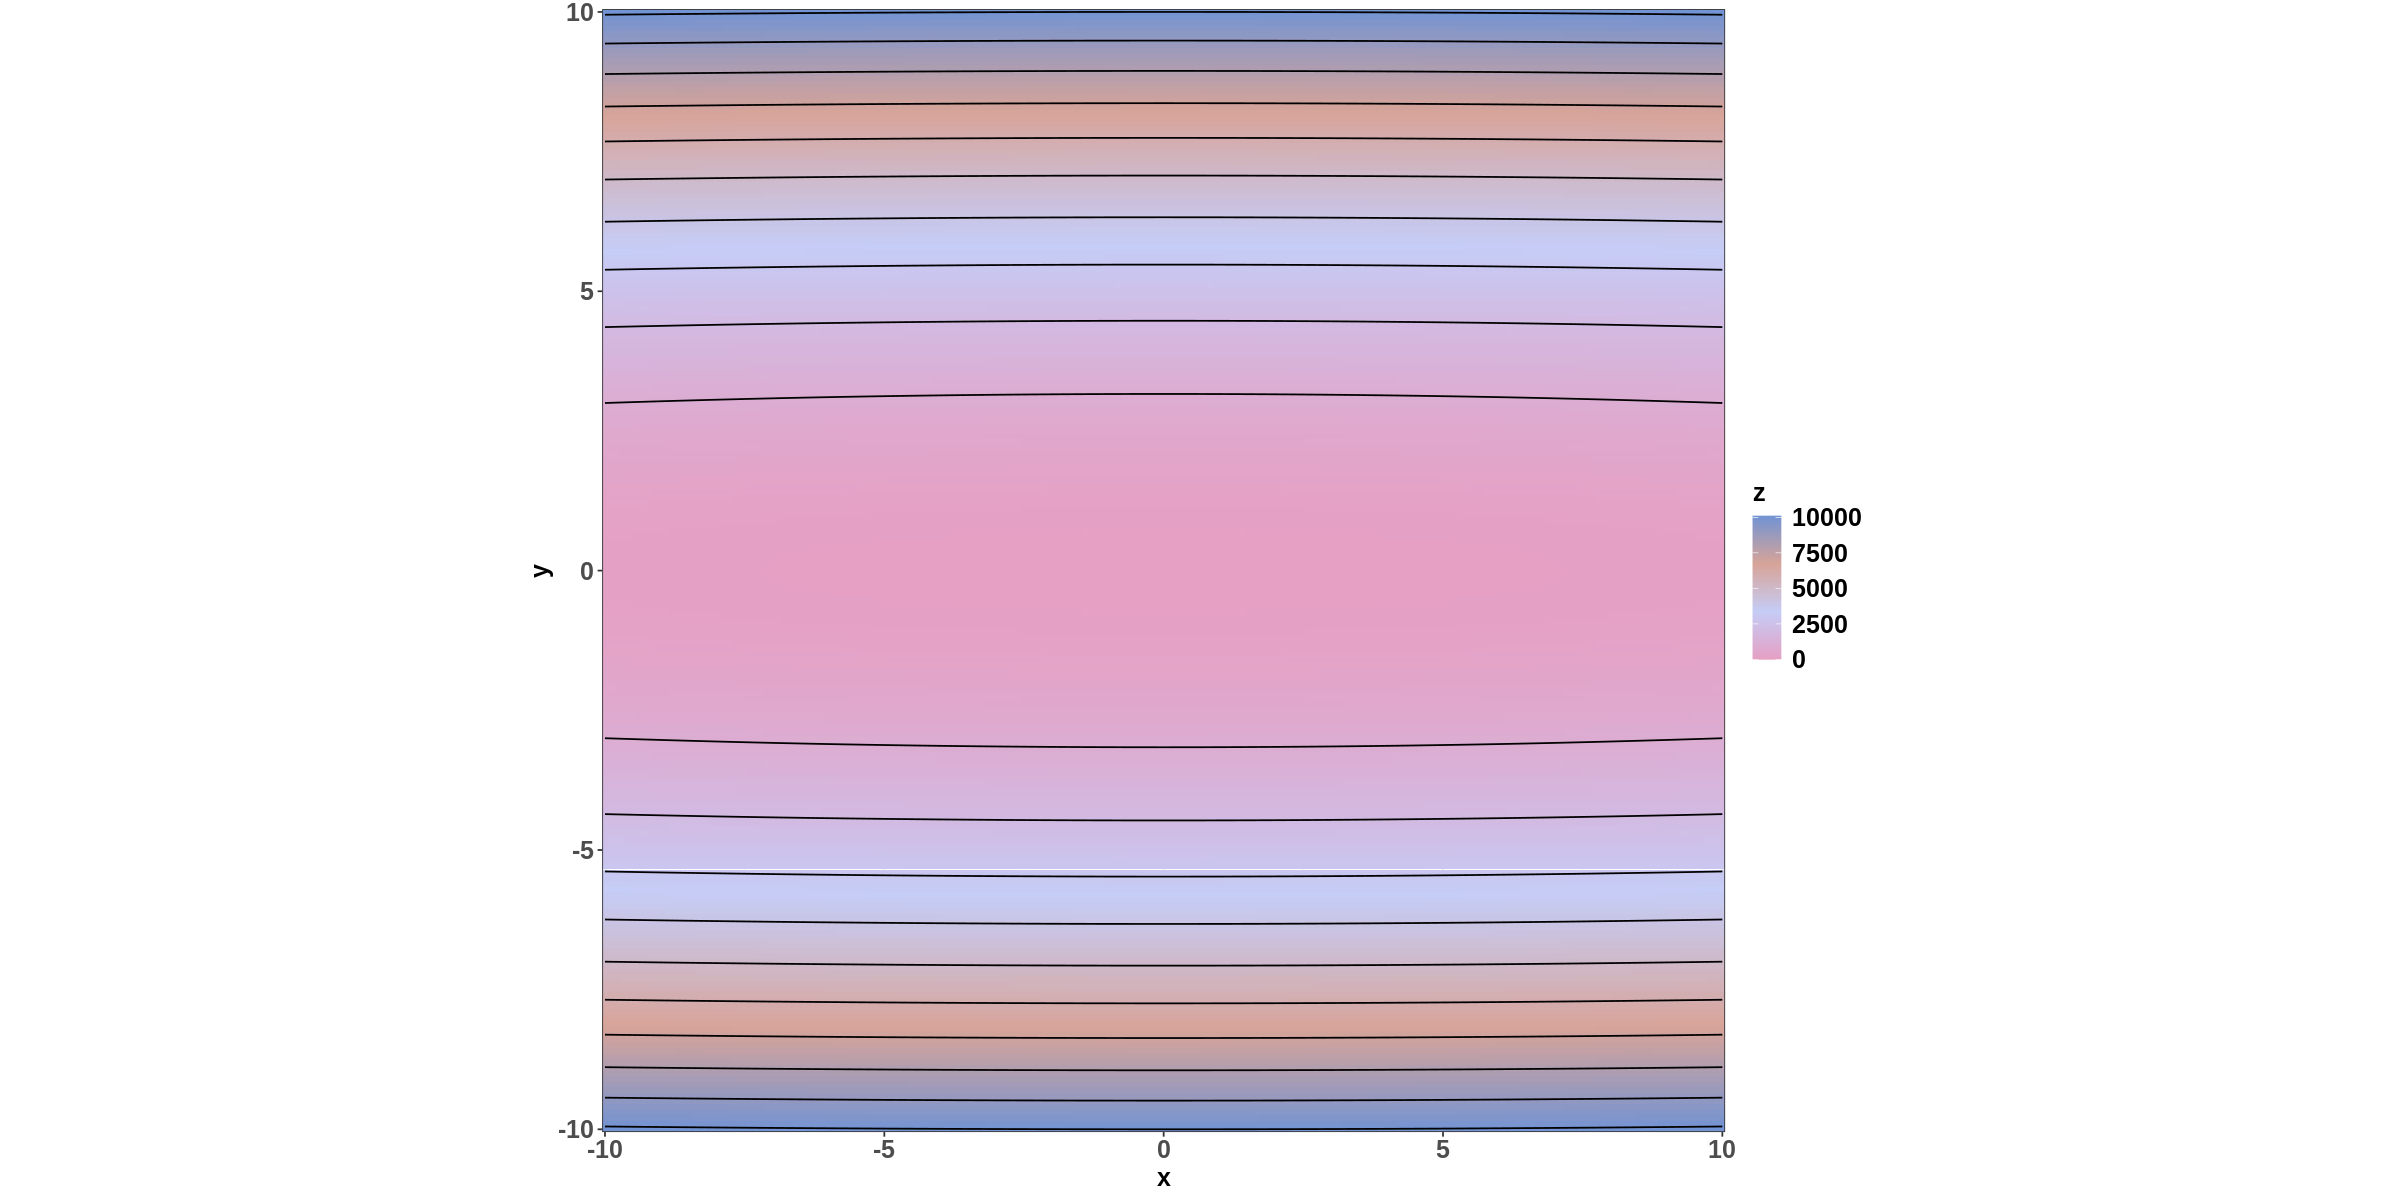

In [44]:
contour_plot(elips10, c(-10, 10), c(-10, 10))

contour_plot(elips100, c(-10, 10), c(-10, 10))

In [84]:
res_sphere = 
    run_exp(lambda, cma_es_ppmf, sphere_func, x0)

In [86]:
res_linear = 
    run_exp(lambda, cma_es_ppmf, linear_func, x0)
res_elips10 = 
    run_exp(lambda, cma_es_ppmf, elips10, x0)
res_elips100 = 
    run_exp(lambda, cma_es_ppmf, elips100, x0)

Warning message:
“UNRELIABLE VALUE: Future (‘<none>’) unexpectedly generated random numbers without specifying argument '[future.]seed'. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify argument '[future.]seed', e.g. 'seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use [future].seed=NULL, or set option 'future.rng.onMisuse' to "ignore".”
Warning message:
“UNRELIABLE VALUE: Future (‘<none>’) unexpectedly generated random numbers without specifying argument '[future.]seed'. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify argument '[future.]seed', e.g. 'seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use [future].seed=NULL, or set option 'future.rng.onMisu

In [87]:
res_sphere %<>% dplyr::mutate(func = "sphere")
res_linear %<>% dplyr::mutate(func = "linear")
res_elips10 %<>% dplyr::mutate(func = "elips10")
res_elips100 %<>% dplyr::mutate(func = "elips100")

all_data = 
    dplyr::bind_rows(res_sphere, res_linear, res_elips10, res_elips100)

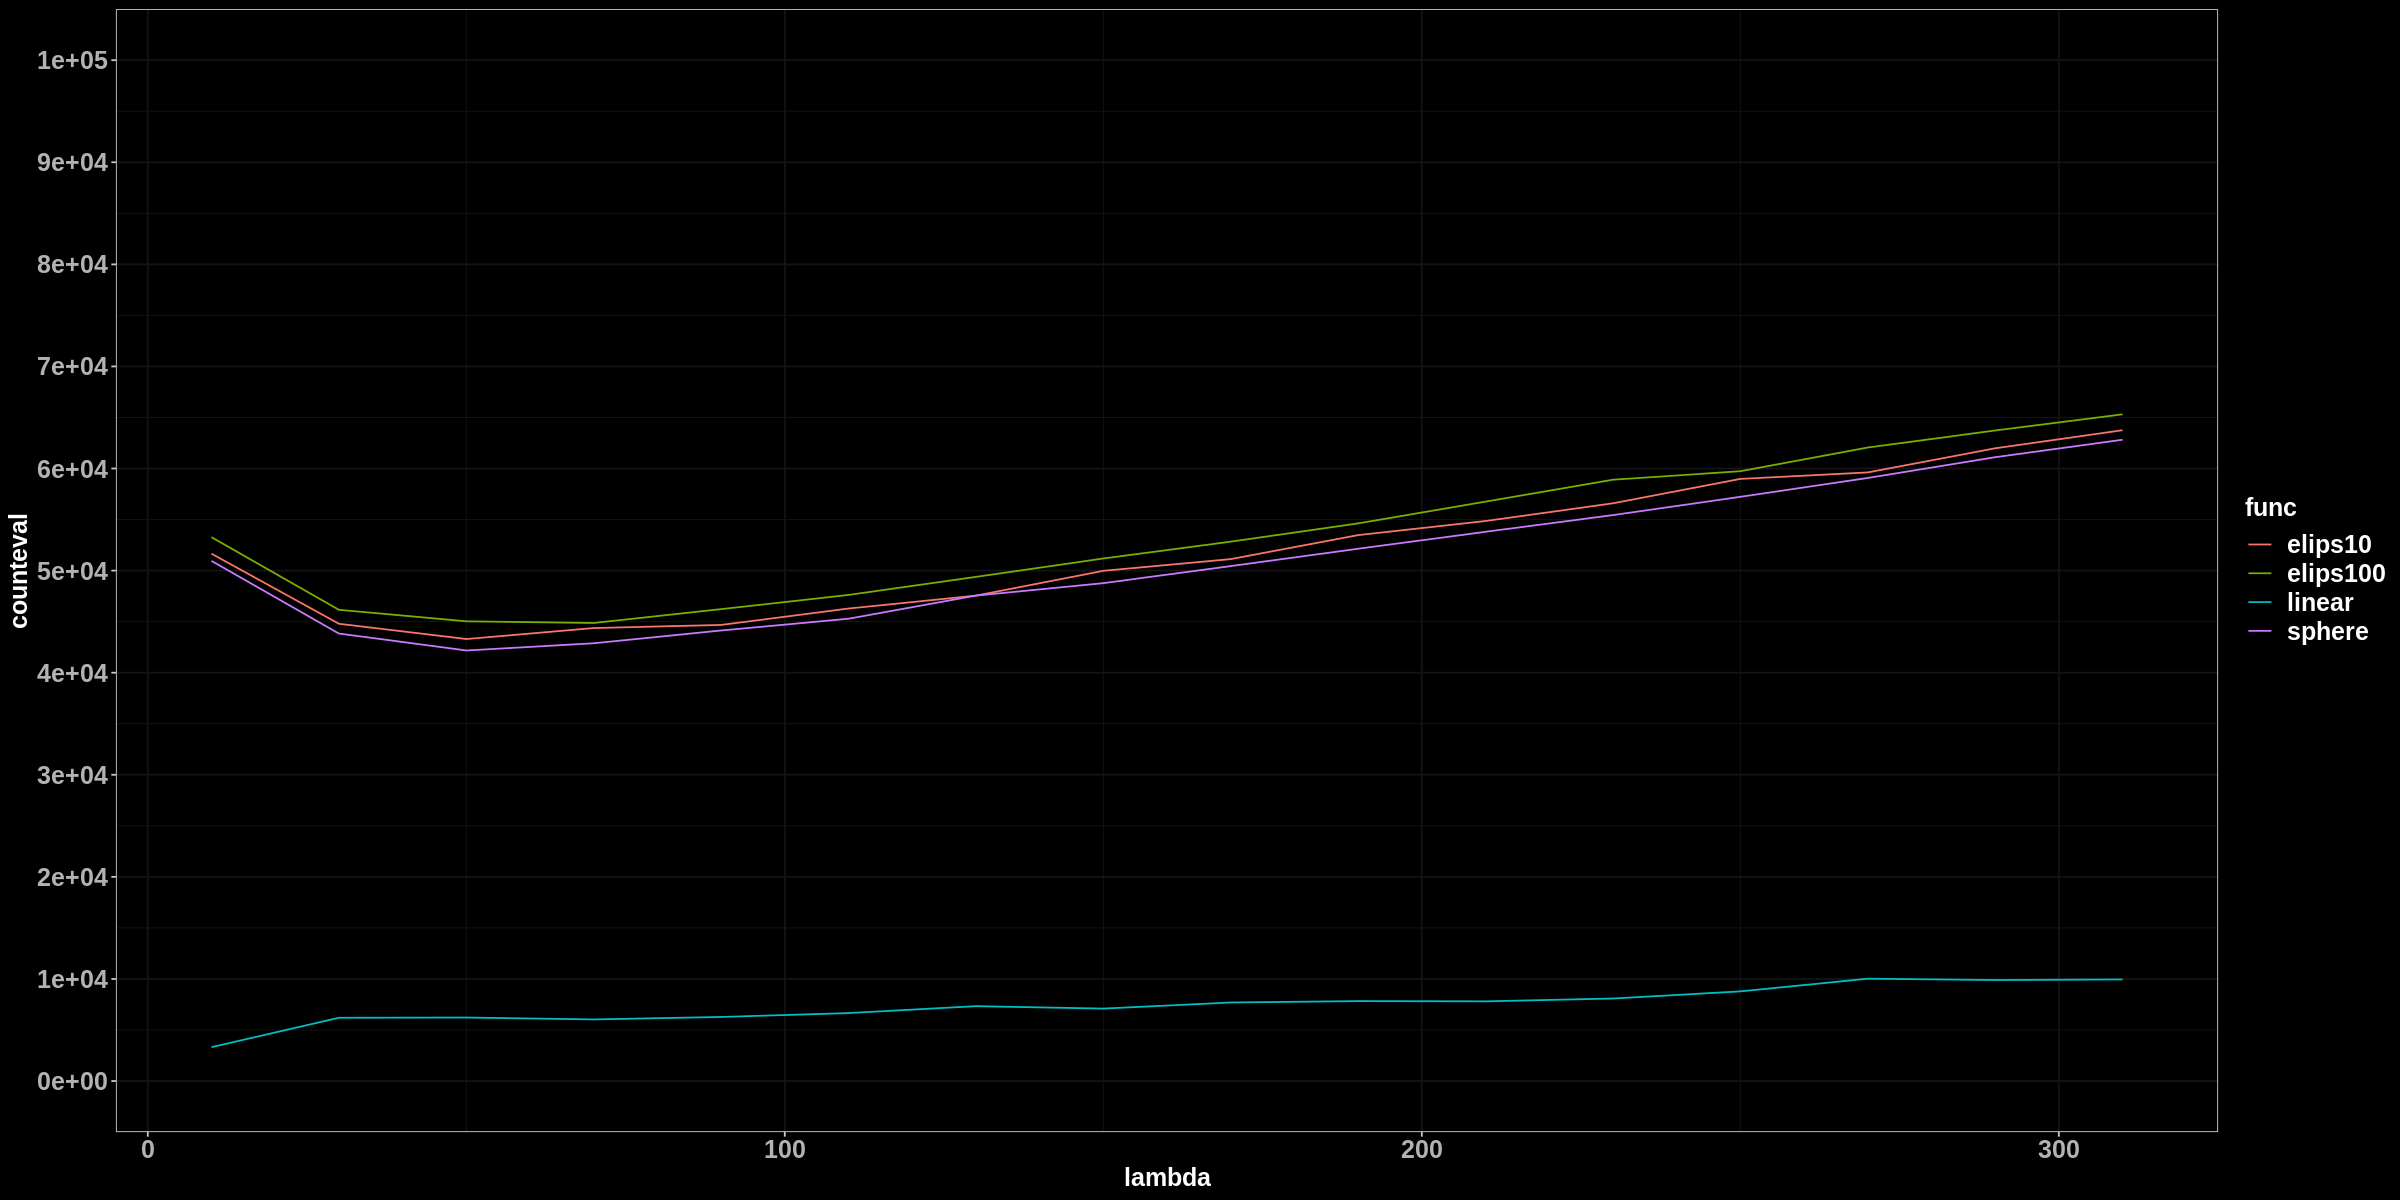

In [88]:
all_data %>% plot_lambda(N = 10)

In [89]:
res_sphere_csa = 
    run_exp(lambda, cma_es_csa, sphere_func, x0)
res_linear_csa = 
    run_exp(lambda, cma_es_csa, linear_func, x0)
res_elips10_csa = 
    run_exp(lambda, cma_es_csa, elips10, x0)
res_elips100_csa = 
    run_exp(lambda, cma_es_csa, elips100, x0)

Warning message:
“UNRELIABLE VALUE: Future (‘<none>’) unexpectedly generated random numbers without specifying argument '[future.]seed'. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify argument '[future.]seed', e.g. 'seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use [future].seed=NULL, or set option 'future.rng.onMisuse' to "ignore".”
Warning message:
“UNRELIABLE VALUE: Future (‘<none>’) unexpectedly generated random numbers without specifying argument '[future.]seed'. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify argument '[future.]seed', e.g. 'seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use [future].seed=NULL, or set option 'future.rng.onMisu

In [90]:
res_sphere_csa %<>% dplyr::mutate(func = "sphere")
res_linear_csa %<>% dplyr::mutate(func = "linear")
res_elips10_csa %<>% dplyr::mutate(func = "elips10")
res_elips100_csa %<>% dplyr::mutate(func = "elips100")

all_data_csa = 
    dplyr::bind_rows(res_sphere_csa, res_linear_csa, res_elips10_csa, res_elips100_csa)

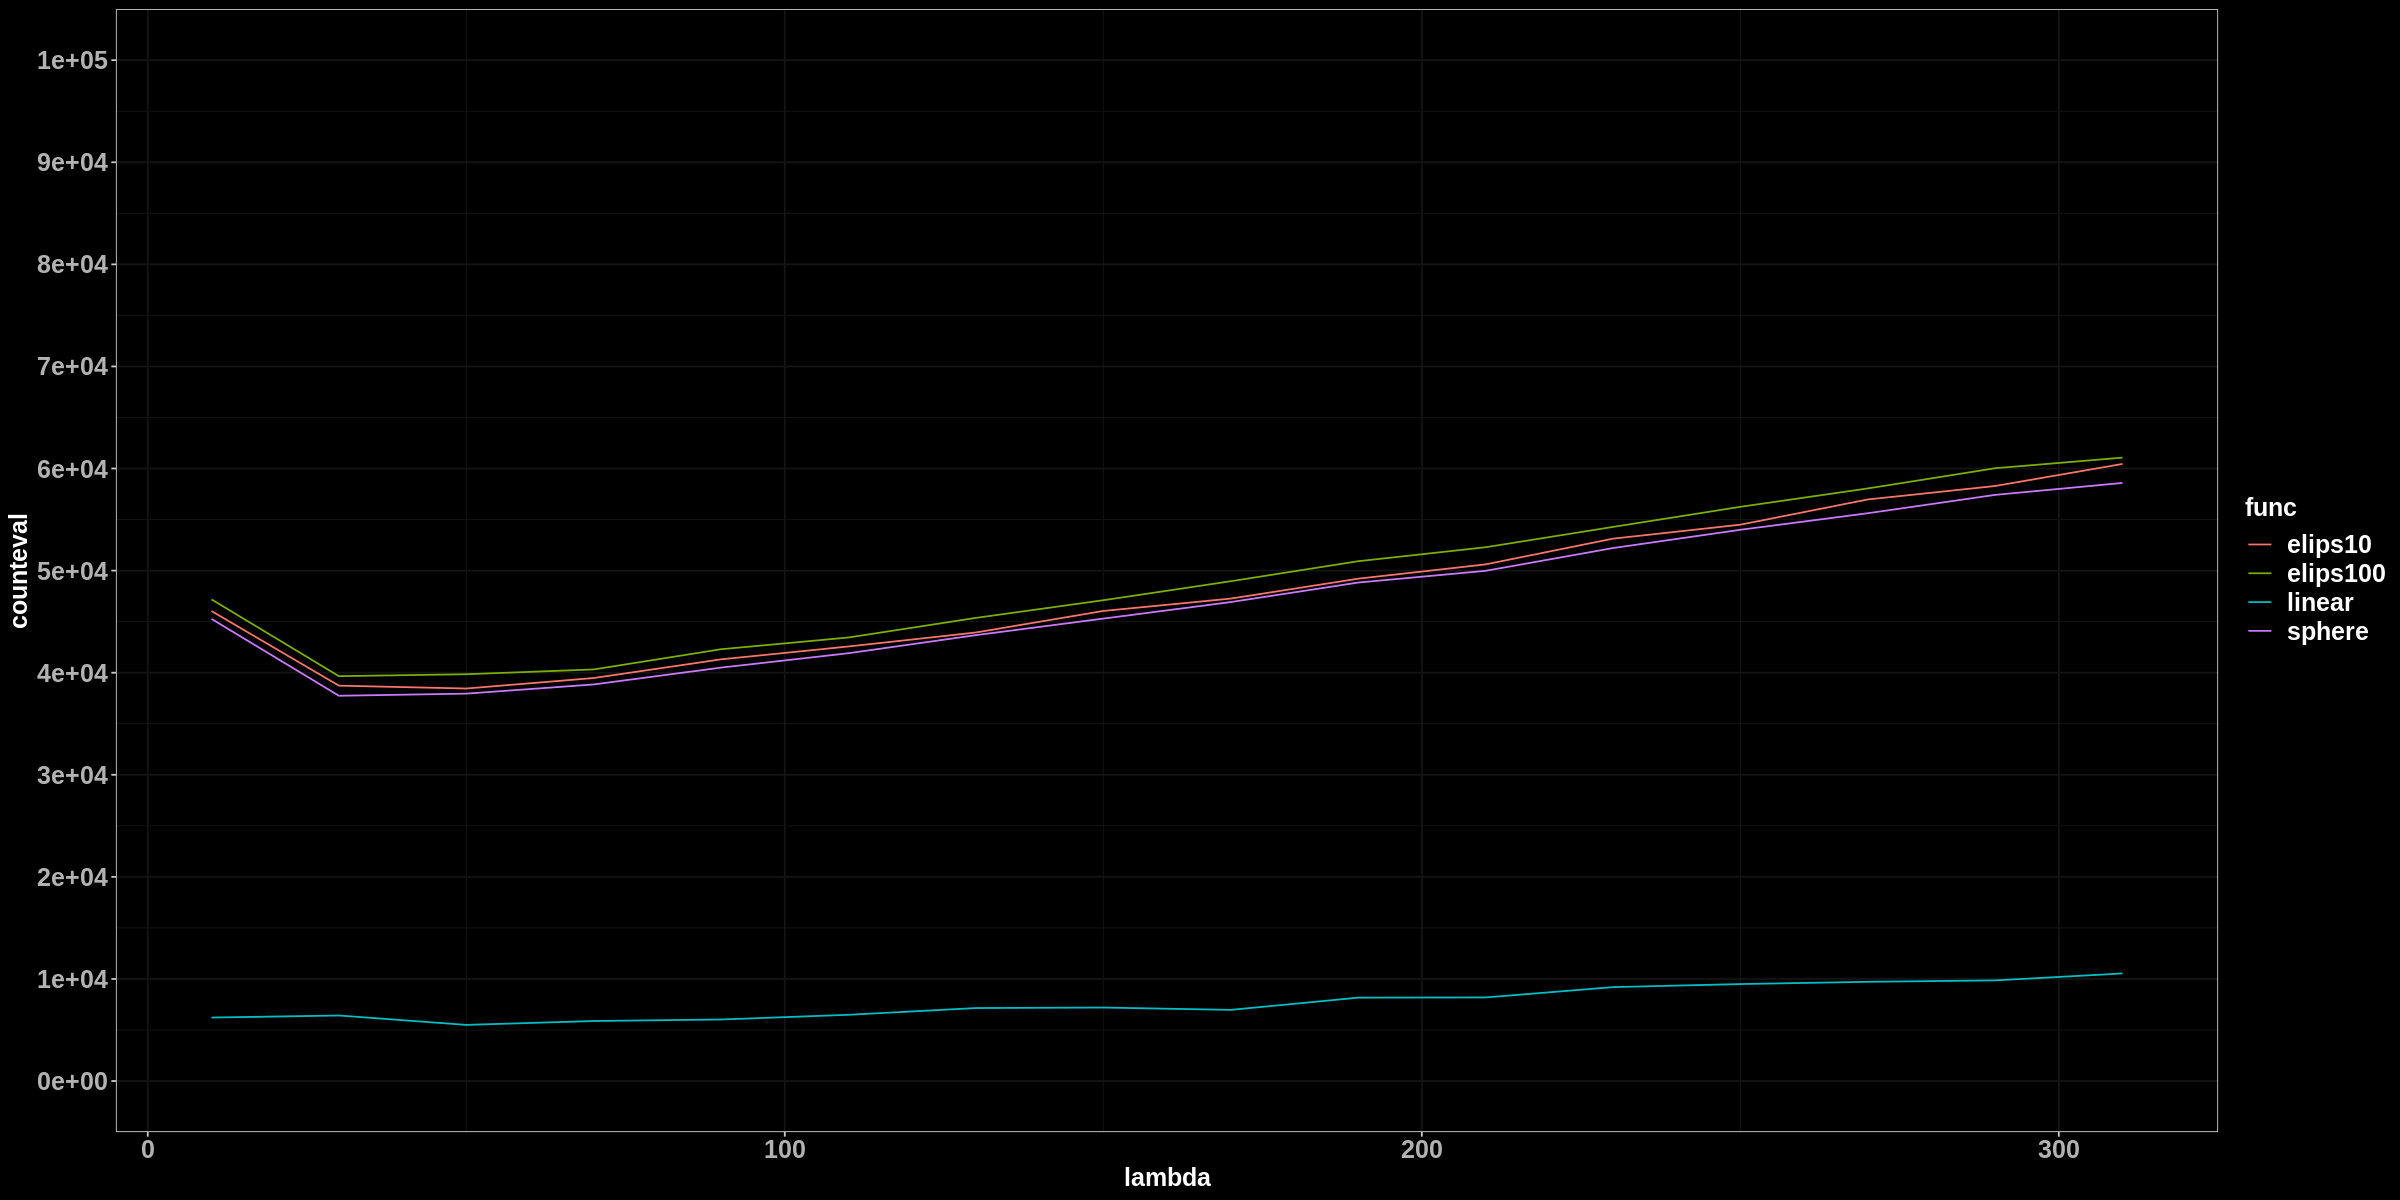

In [91]:
all_data_csa %>% plot_lambda(N = 10)

In [94]:
res_sphere_tpat = 
    run_exp(lambda, cma_es_tpat, sphere_func, x0)
res_linear_tpat = 
    run_exp(lambda, cma_es_tpat, linear_func, x0)
res_elips10_tpat = 
    run_exp(lambda, cma_es_tpat, elips10, x0)
res_elips100_tpat = 
    run_exp(lambda, cma_es_tpat, elips100, x0)

Warning message:
“UNRELIABLE VALUE: Future (‘<none>’) unexpectedly generated random numbers without specifying argument '[future.]seed'. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify argument '[future.]seed', e.g. 'seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use [future].seed=NULL, or set option 'future.rng.onMisuse' to "ignore".”
Warning message:
“UNRELIABLE VALUE: Future (‘<none>’) unexpectedly generated random numbers without specifying argument '[future.]seed'. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify argument '[future.]seed', e.g. 'seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use [future].seed=NULL, or set option 'future.rng.onMisu

In [95]:
res_sphere_tpat %<>% dplyr::mutate(func = "sphere")
res_linear_tpat %<>% dplyr::mutate(func = "linear")
res_elips10_tpat %<>% dplyr::mutate(func = "elips10")
res_elips100_tpat %<>% dplyr::mutate(func = "elips100")

In [95]:
all_data_tpat = 
    dplyr::bind_rows(res_sphere_tpat, res_linear_tpat, res_elips10_tpat, res_elips100_tpat)

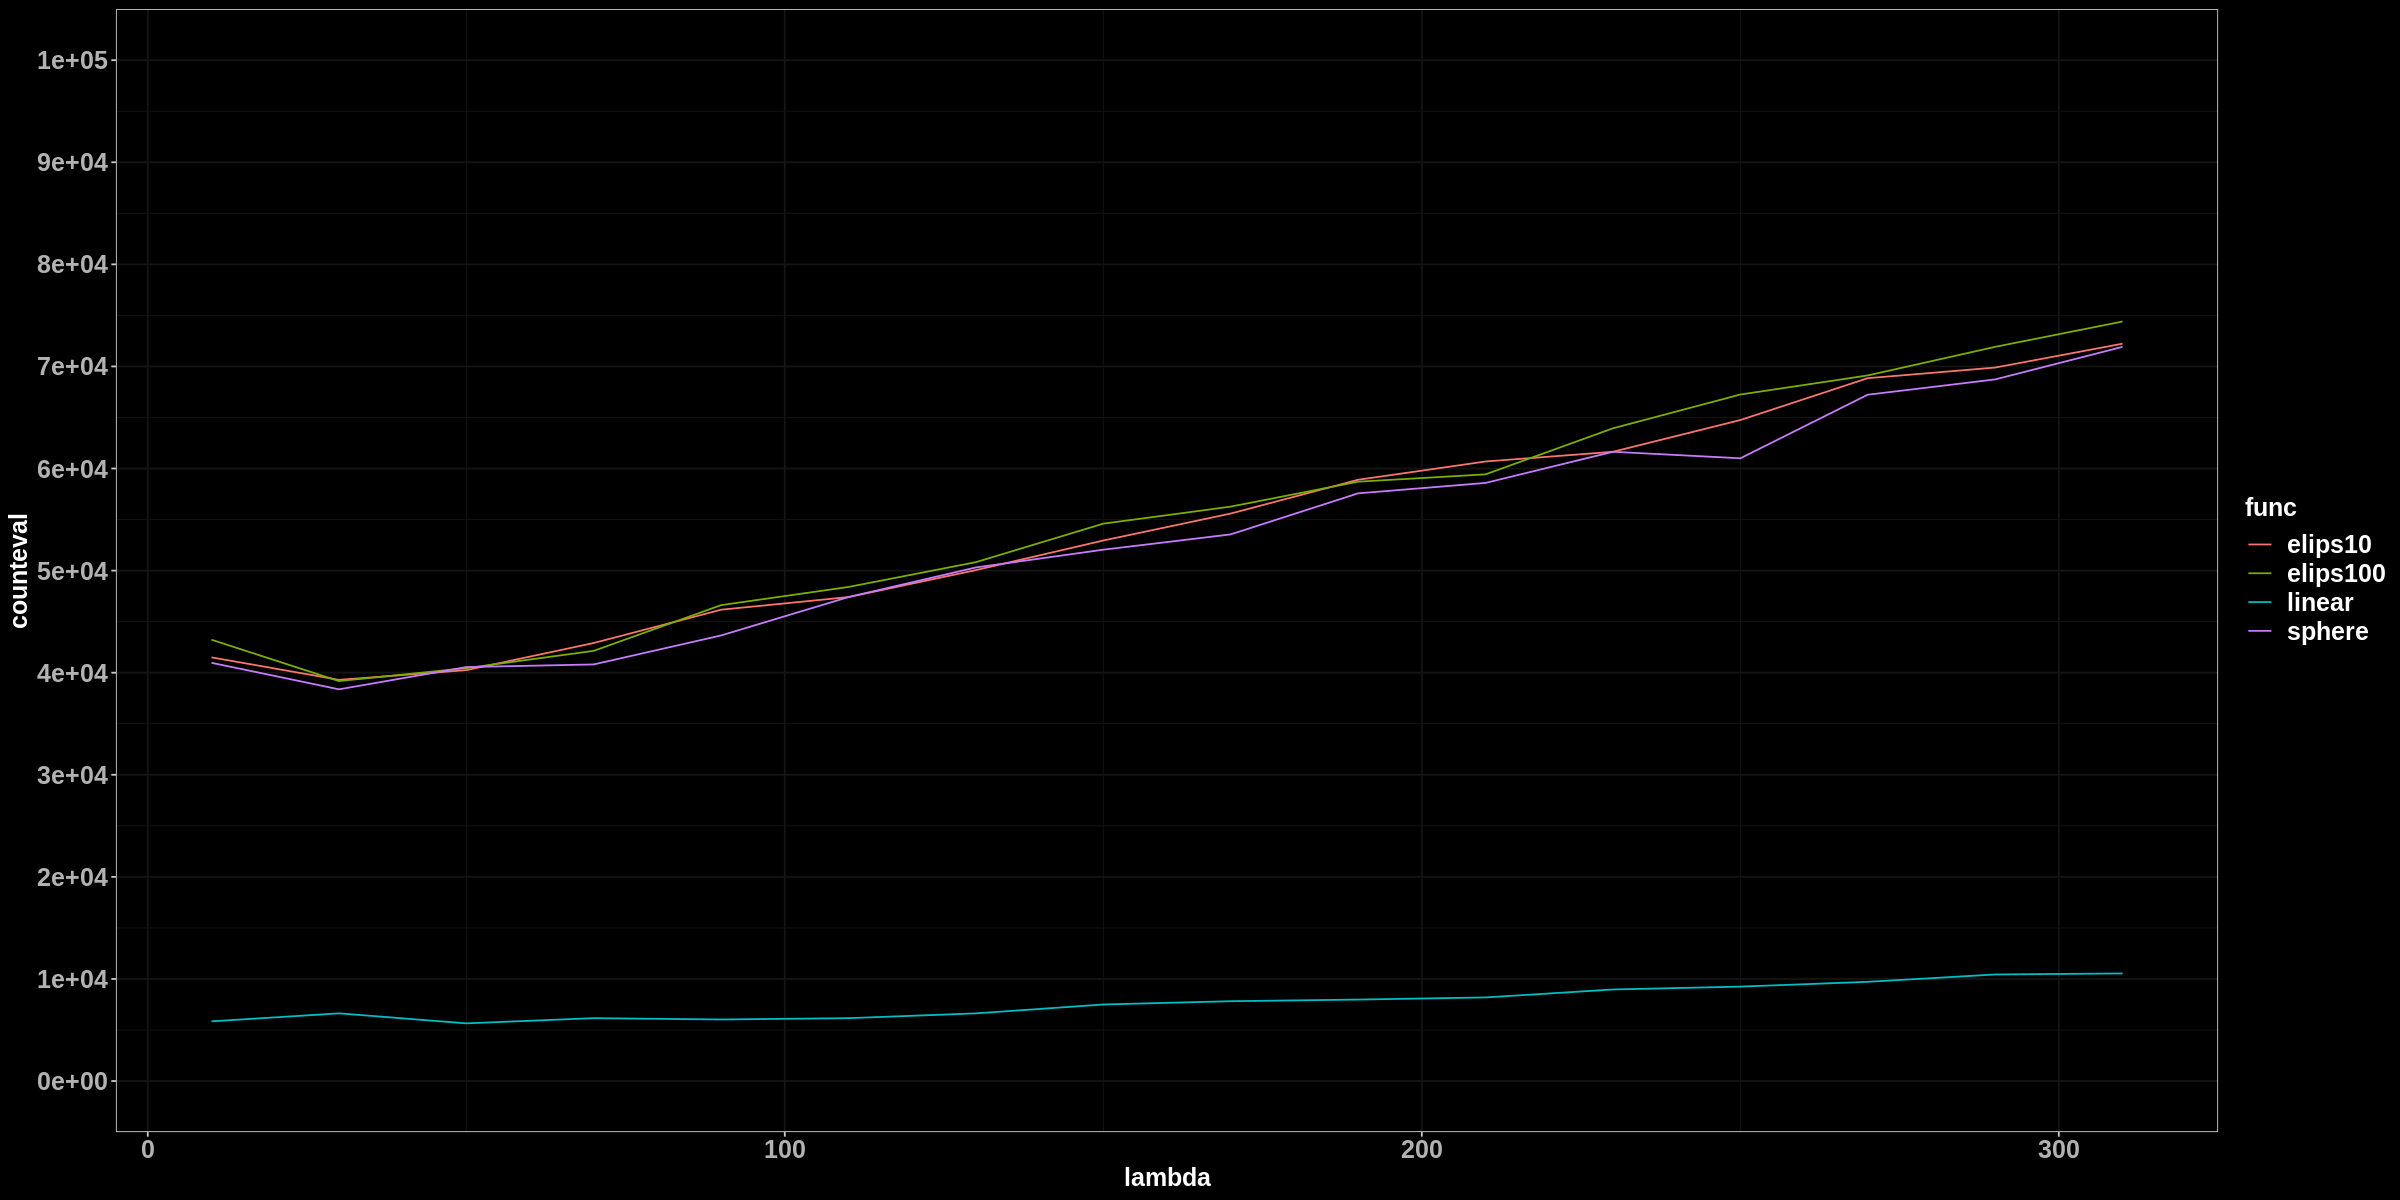

In [97]:
all_data_tpat %>% plot_lambda(N = 10)

In [98]:
all_algs_lambda = 
    dplyr::bind_rows(
        all_data %>% dplyr::mutate(method = "PPMF"),
        all_data_csa %>% dplyr::mutate(method = "CSA"),
        all_data_tpat %>% dplyr::mutate(method = "TPAT")
    )

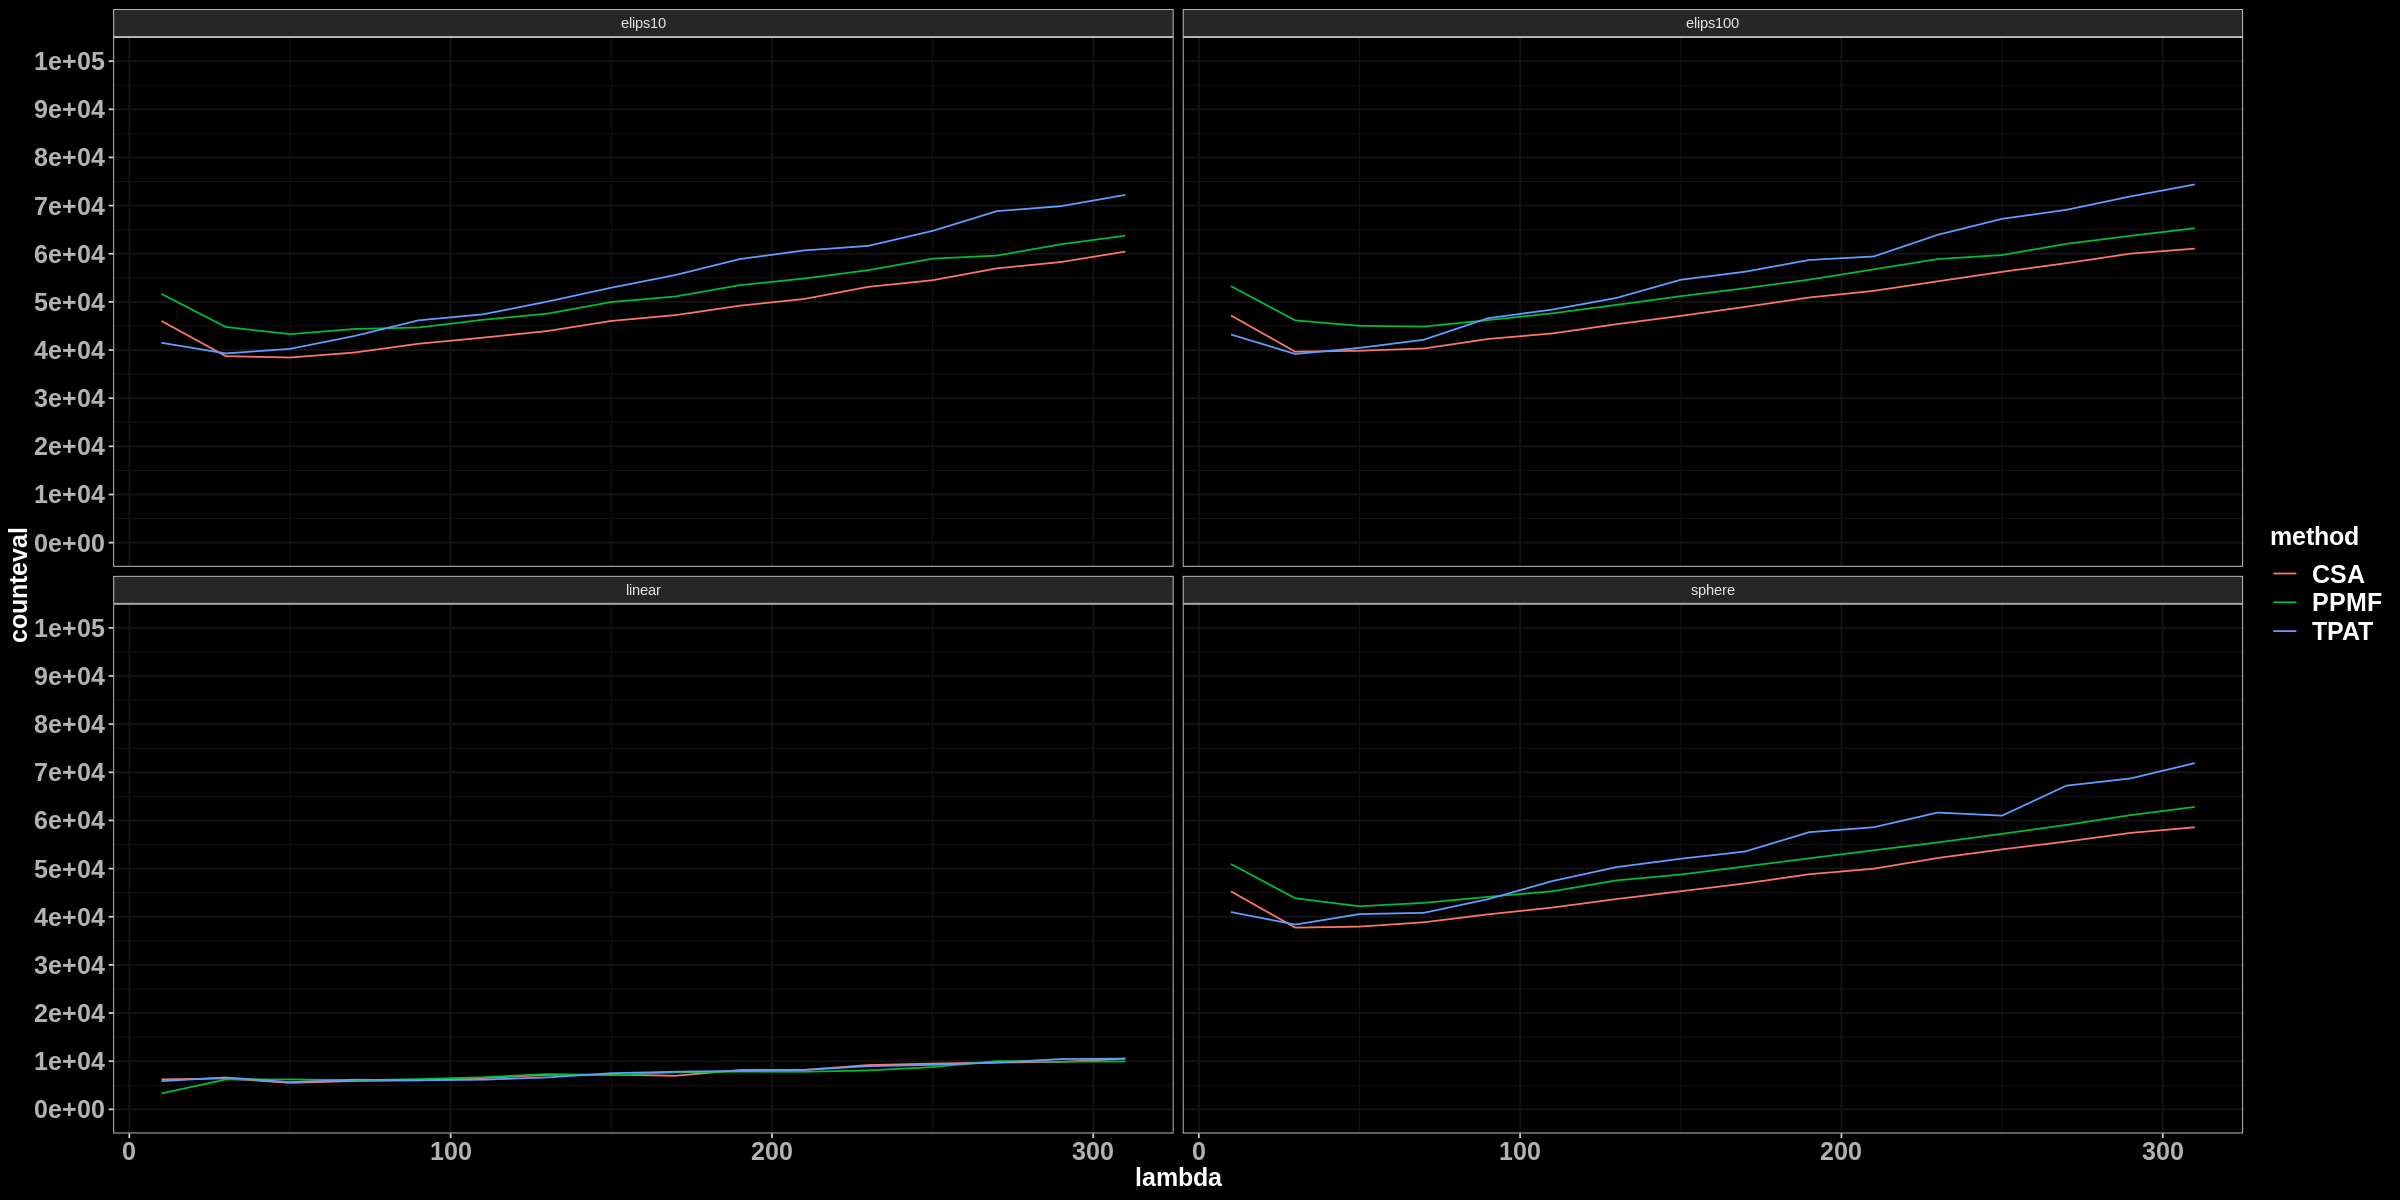

In [102]:
all_algs_lambda %>% plot_lambda_alg(N = 10)
    